In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Улучшение качества</b></h3>

#  Домашнее задание

#### Задание  

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов наиболее эффективно. Данные для обучения моделей необходимо загрузить самостоятельно с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease). Она принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробное описание признаков можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.


1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей:
        a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель логистической регрессии с параметрами по умолчанию.
5. Подсчитайте основные метрики модели. Используйте следующие метрики и функцию:
            cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])
6. Оптимизируйте 3-4 параметра модели:
        a) Используйте GridSearchCV.
        b) Используйте RandomizedSearchCV.
        c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров.
        d) Повторите п. 5 после каждого итогового изменения параметров.
7. Сформулируйте выводы по проделанной работе:
        a) Сравните метрики построенных моделей.
        b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».

###### 1. Получите данные и загрузите их в рабочую среду 

In [85]:
data = pd.read_csv('heart.csv')

In [86]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [87]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [88]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


###### 2. Подготовьте датасет к обучению моделей:
        a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [89]:
data['Sex'].replace(['F','M'],[0,1], inplace=True)
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [90]:
data['ExerciseAngina'].replace(['N','Y'],[0,1], inplace=True)
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1


In [91]:
data = pd.get_dummies(data, columns = ['ChestPainType', 'RestingECG', 'ST_Slope'] )
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


###### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [92]:
y, X = data['HeartDisease'], data.drop(columns='HeartDisease')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### 4. Обучите модель логистической регрессии с параметрами по умолчанию.

In [94]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [95]:
predictions = model.predict(X_test)

In [96]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



###### 5. Подсчитайте основные метрики модели. Используйте следующие метрики и функцию:
            cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
# cross_validate

In [99]:
log_cv_results = cross_validate(model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [102]:
df_scores = pd.DataFrame(log_cv_results, index = range(1, 11))

df_scores

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
1,0.275304,0.020900,0.918919,0.925000,0.925000,0.925000
2,0.295298,0.000000,0.878378,0.875000,0.897436,0.886076
3,0.184888,0.000000,0.891892,0.875000,0.921053,0.897436
4,0.247112,0.008470,0.864865,0.902439,0.860465,0.880952
5,0.294506,0.012974,0.835616,0.875000,0.833333,0.853659
6,0.301294,0.000000,0.890411,0.925000,0.880952,0.902439
7,0.115886,0.000000,0.767123,0.825000,0.767442,0.795181
8,0.222648,0.000000,0.876712,0.900000,0.878049,0.888889
9,0.147143,0.000000,0.876712,0.925000,0.860465,0.891566
10,0.284786,0.000000,0.835616,0.900000,0.818182,0.857143


In [103]:
accuracy = log_cv_results['test_accuracy'].mean()
recall = log_cv_results['test_recall'].mean()
precision = log_cv_results['test_precision'].mean()
f1 = log_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy:.2}')
print(f'Recall: {recall:.2}')
print(f'Precision: {precision:.2}')
print(f'F1: {f1:.2}')

Accuracy: 0.86
Recall: 0.89
Precision: 0.86
F1: 0.88


###### 6. Оптимизируйте 3-4 параметра модели:
        a) Используйте GridSearchCV.

In [104]:
param_grid = {"penalty" :  ['l1','l2'],
             "l1_ratio" : np.linspace(0, 1, 10),
              "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
             "C" : np.logspace(-4,4,7)}

In [105]:
lr_grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, scoring='accuracy')

In [106]:
lr_grid_model = lr_grid_model.fit(X_train, y_train)

In [107]:
print(f"tuned hyperparameters : {lr_grid_model.best_params_}")
print(f"accuracy : {lr_grid_model.best_score_:.2}")

tuned hyperparameters : {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.87


        b) Используйте RandomizedSearchCV.

In [108]:
lr_randsearch_model = RandomizedSearchCV(model, param_distributions = param_grid)

In [109]:
lr_randsearch_model = lr_randsearch_model.fit(X_train, y_train)

In [110]:
print(f"tuned hyperparameters : {lr_randsearch_model.best_params_}")
print(f"accuracy : {lr_randsearch_model.best_score_:.2}")

tuned hyperparameters : {'solver': 'liblinear', 'penalty': 'l1', 'l1_ratio': 0.3333333333333333, 'C': 1.0}
accuracy : 0.87


        c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров.

In [111]:
# DecisionTreeClassifier
params_dt = {'criterion':['gini','entropy'], 
             'max_depth':[None,2,6,8,12], 
             'min_samples_split':[2,4,7,10],
             'min_samples_leaf':[15,100]}

In [112]:
dt_model = DecisionTreeClassifier()
dt_randsearch_model = RandomizedSearchCV(estimator = dt_model, param_distributions = params_dt, cv =10)

dt_randsearch_model = dt_randsearch_model.fit(X_train, y_train)

In [113]:
print(f"tuned hyperparameters : {dt_randsearch_model.best_params_}")
print(f"accuracy : {dt_randsearch_model.best_score_:.2}")

tuned hyperparameters : {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': None, 'criterion': 'gini'}
accuracy : 0.82


In [114]:
#  RandomForestClassifier 

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [115]:
rf_model = RandomForestClassifier()
rf_randsearch_model = RandomizedSearchCV(estimator = rf_model, param_distributions = params_rf, cv =10)

rf_randsearch_model = rf_randsearch_model.fit(X_train, y_train)

In [116]:
print(f"tuned hyperparameters : {rf_randsearch_model.best_params_}")
print(f"accuracy : {rf_randsearch_model.best_score_:.2}")

tuned hyperparameters : {'n_estimators': 211, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
accuracy : 0.87


In [117]:
# KNeighborsClassifier

ks = range(5, 20)
leaf_size = range(10, 50)
params_kn = {'leaf_size': leaf_size, 
              'n_neighbors': ks}

In [118]:
kn_randsearch_model = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=params_kn, cv=10)
kn_randsearch_model = kn_randsearch_model.fit(X_train, y_train)

In [119]:
print(f"tuned hyperparameters : {kn_randsearch_model.best_params_}")
print(f"accuracy : {kn_randsearch_model.best_score_:.2}")

tuned hyperparameters : {'n_neighbors': 10, 'leaf_size': 16}
accuracy : 0.74


In [120]:
# SVM

params_svm = {'C': [10, 15, 20, 50, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}


In [121]:
svm_randsearch_model = RandomizedSearchCV(SVC(), param_distributions=params_svm, cv=10)
svm_randsearch_model = svm_randsearch_model.fit(X_train, y_train)

In [122]:
print(f"tuned hyperparameters : {svm_randsearch_model.best_params_}")
print(f"accuracy : {svm_randsearch_model.best_score_:.2}")

tuned hyperparameters : {'kernel': 'linear', 'gamma': 0.0001, 'C': 20}
accuracy : 0.86


        d) Повторите п. 5 после каждого итогового изменения параметров.

In [ ]:
# GridSearchCV -> LogisticRegression

In [123]:
lr_grid_cv_results = cross_validate(lr_grid_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [124]:
accuracy_lr_grid = lr_grid_cv_results['test_accuracy'].mean()
recall_lr_grid = lr_grid_cv_results['test_recall'].mean()
precision_lr_grid = lr_grid_cv_results['test_precision'].mean()
f1_lr_grid = lr_grid_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy_lr_grid:.2}')
print(f'Recall: {recall_lr_grid:.2}')
print(f'Precision: {precision_lr_grid:.2}')
print(f'F1: {f1_lr_grid:.2}')

Accuracy: 0.86
Recall: 0.89
Precision: 0.86
F1: 0.87


In [125]:
# RandomizedSearchCV -> LogisticRegression

In [126]:
lr_randsearch_cv_results = cross_validate(lr_randsearch_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [127]:
accuracy_lr_randsearch = lr_randsearch_cv_results['test_accuracy'].mean()
recall_lr_randsearch = lr_randsearch_cv_results['test_recall'].mean()
precision_lr_randsearch = lr_randsearch_cv_results['test_precision'].mean()
f1_lr_randsearch = lr_randsearch_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy_lr_randsearch:.2}')
print(f'Recall: {recall_lr_randsearch:.2}')
print(f'Precision: {precision_lr_randsearch:.2}')
print(f'F1: {f1_lr_randsearch:.2}')

Accuracy: 0.86
Recall: 0.89
Precision: 0.86
F1: 0.88


In [ ]:
# RandomizedSearchCV -> DecisionTreeClassifier

In [128]:
dt_randsearch_cv_results = cross_validate(dt_randsearch_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [129]:
accuracy_dt_randsearch = dt_randsearch_cv_results['test_accuracy'].mean()
recall_dt_randsearch = dt_randsearch_cv_results['test_recall'].mean()
precision_dt_randsearch = dt_randsearch_cv_results['test_precision'].mean()
f1_dt_randsearch = dt_randsearch_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy_dt_randsearch:.2}')
print(f'Recall: {recall_dt_randsearch:.2}')
print(f'Precision: {precision_dt_randsearch:.2}')
print(f'F1: {f1_dt_randsearch:.2}')

Accuracy: 0.81
Recall: 0.85
Precision: 0.82
F1: 0.83


In [ ]:
# RandomizedSearchCV -> RandomForestClassifier 

In [130]:
rf_randsearch_cv_results = cross_validate(rf_randsearch_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [131]:
accuracy_rf_randsearch = rf_randsearch_cv_results['test_accuracy'].mean()
recall_rf_randsearch = rf_randsearch_cv_results['test_recall'].mean()
precision_rf_randsearch = rf_randsearch_cv_results['test_precision'].mean()
f1_rf_randsearch = rf_randsearch_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy_rf_randsearch:.2}')
print(f'Recall: {recall_rf_randsearch:.2}')
print(f'Precision: {precision_rf_randsearch:.2}')
print(f'F1: {f1_rf_randsearch:.2}')

Accuracy: 0.87
Recall: 0.92
Precision: 0.86
F1: 0.88


In [ ]:
# RandomizedSearchCV -> KNeighborsClassifier

In [132]:
kn_randsearch_cv_results = cross_validate(kn_randsearch_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [133]:
accuracy_kn_randsearch = kn_randsearch_cv_results['test_accuracy'].mean()
recall_kn_randsearch = kn_randsearch_cv_results['test_recall'].mean()
precision_kn_randsearch = kn_randsearch_cv_results['test_precision'].mean()
f1_kn_randsearch = kn_randsearch_cv_results['test_f1'].mean()

print(f'Accuracy: {accuracy_kn_randsearch:.2}')
print(f'Recall: {recall_kn_randsearch:.2}')
print(f'Precision: {precision_kn_randsearch:.2}')
print(f'F1: {f1_kn_randsearch:.2}')

Accuracy: 0.72
Recall: 0.76
Precision: 0.74
F1: 0.75


In [134]:
# RandomizedSearchCV -> SVM

In [138]:
svm_randsearch_cv_results = cross_validate(svm_randsearch_model, X_train, y_train, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

In [139]:
accuracy_svmn_randsearch = svm_randsearch_cv_results['test_accuracy'].mean()
recall_svm_randsearch = svm_randsearch_cv_results['test_recall'].mean()
precision_svm_randsearch = svm_randsearch_cv_results['test_precision'].mean()
f1_svm_randsearch = svm_randsearch_cv_results['test_f1'].mean()


In [140]:
print(f'Accuracy: {accuracy_svmn_randsearch:.2}')
print(f'Recall: {recall_svm_randsearch:.2}')
print(f'Precision: {precision_svm_randsearch:.2}')
print(f'F1: {f1_svm_randsearch:.2}')

Accuracy: 0.86
Recall: 0.91
Precision: 0.85
F1: 0.88


###### 7. Сформулируйте выводы по проделанной работе:
        a) Сравните метрики построенных моделей.
        b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».

### ВЫВОДЫ: 

Метрики обученных моделей примерно одинаковы, что говорит о том, что модель хорошо обучена даже на простой логистической регрессии. Дальнейшее улучшение не дает ощутимого роста качества модели.
Применение кросвалидации дает значительные улучшения качества модели, в отличии от оптимизации параметров модели.

Ниже представлены метрики моделей из ДЗ"Ансамблирование", откуда видно что модель обученная на StackingClassifier наиболее эффективна (в рамках изучения курса по машинному обучению) для данного датасета.


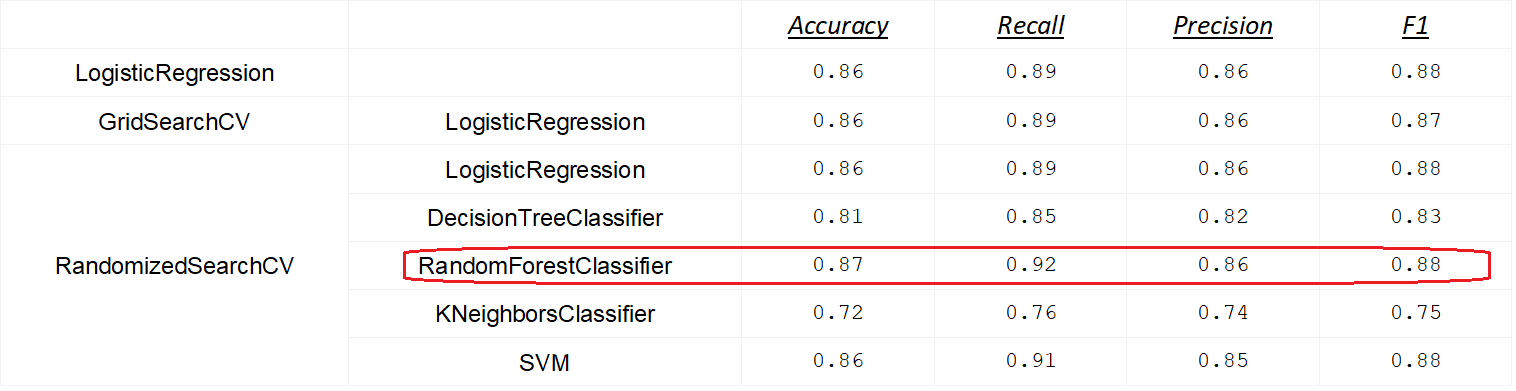
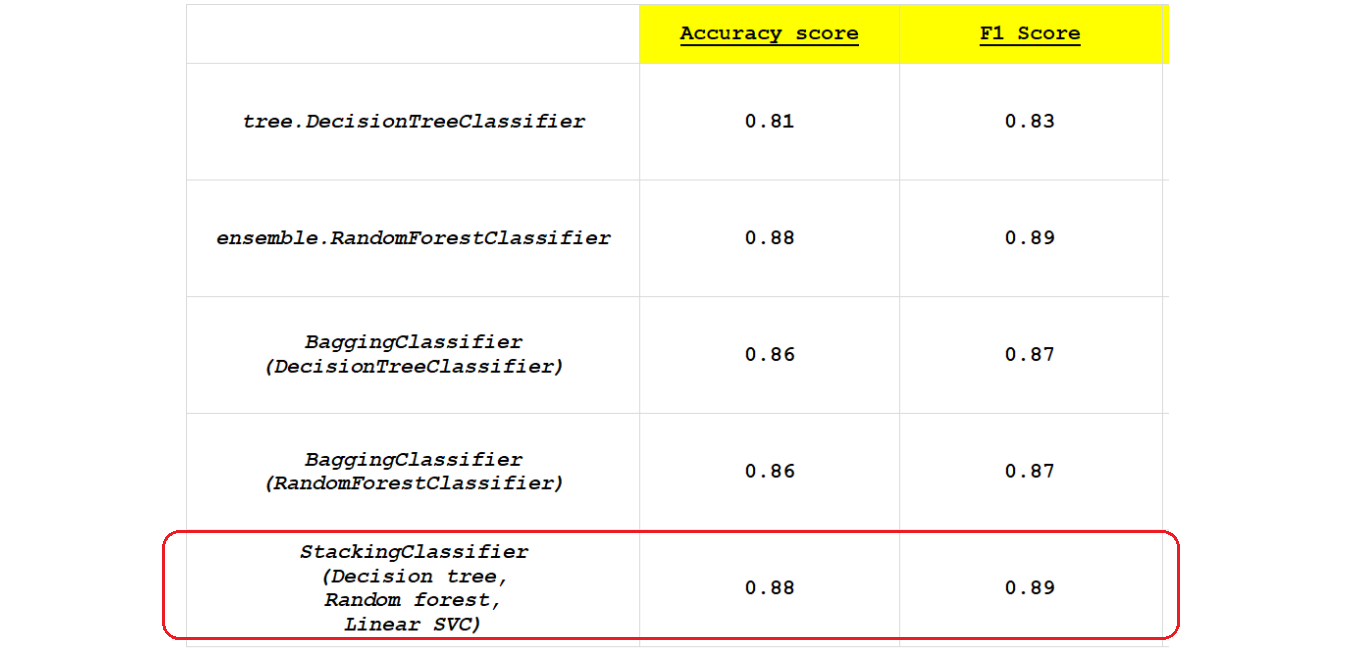